In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

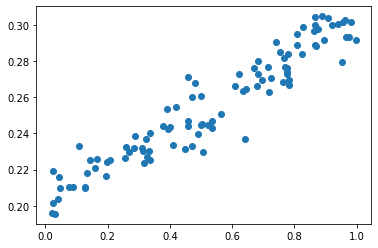

In [3]:
x_data = np.random.rand(100)
noise = np.random.normal(0,0.01,x_data.shape)
y_data = x_data*0.1 + 0.2 + noise
plt.scatter(x_data,y_data)
plt.show()

0.9526892734979661
0 [array([0.12069291]), array([0.27355653])]
20 [array([0.09300072]), array([0.2060855])]
40 [array([0.09668341]), array([0.20399073])]
60 [array([0.09836315]), array([0.20303527])]
80 [array([0.09912931]), array([0.20259947])]
100 [array([0.09947877]), array([0.20240069])]
120 [array([0.09963816]), array([0.20231002])]
140 [array([0.09971086]), array([0.20226867])]
160 [array([0.09974402]), array([0.20224981])]
180 [array([0.09975915]), array([0.2022412])]
200 [array([0.09976605]), array([0.20223728])]


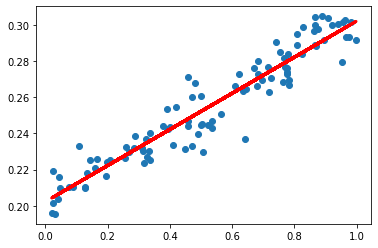

In [7]:
#构建一个线性模型
d = tf.Variable(np.random.rand(1))
k = tf.Variable(np.random.rand(1))
y = k*x_data+d
#二次代价函数
loss = tf.losses.mean_squared_error(y_data,y)
#定义一个梯度下降优化器
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.3)
#最小化代价函数
train = optimizer.minimize(loss)

#初始化变量
init = tf.compat.v1.global_variables_initializer()
print(np.corrcoef(x_data,y_data)[0,1])
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for i in range(201):
        sess.run(train)
        if  i%20 ==0:
            print(i,sess.run([k,d]))
    y_pred = sess.run(y)
    
    plt.scatter(x_data,y_data)
    plt.plot(x_data,y_pred,'r-',lw=3)
    plt.show()